MNIST Dataset Analysis: 
This is a well known dataset that consists of 42,000+ hand drawn images of numbers 0-9. These images 
are 28x28 pixels which is 784 columns when flat. The dataset that represents these images are analyzed using 
a discrete cosine transformation "DCT" algorithm. This DCT is a decomposition of the image; horizontal, vertical, 
and diagonal using 3 hardcoded "masks" of 0s and 1s to show the computer which pixels of the image to focus 
on for the decomposition.

Image representation of index 1 in the "training" dataset which shows a handwritten digit.


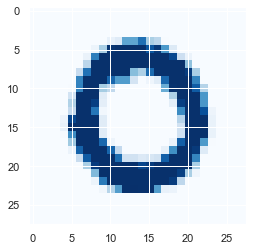


Image representation of index 2 in the "training" dataset which shows a handwritten digit.


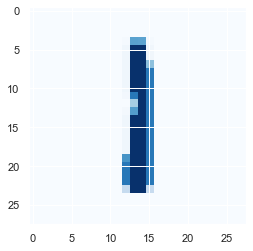


Image representation of index 4 in the "training" dataset which shows a handwritten digit.


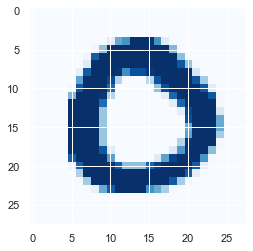


Image representation of index 7 in the "training" dataset which shows a handwritten digit.


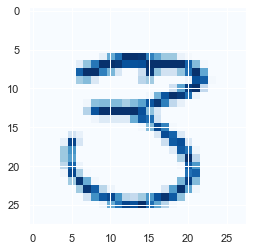


Image representation of index 8 in the "training" dataset which shows a handwritten digit.


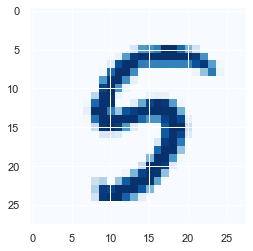


Image representation of index 9 in the "training" dataset which shows a handwritten digit.


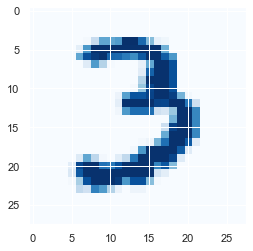


Image representation of index 11 in the "training" dataset which shows a handwritten digit.


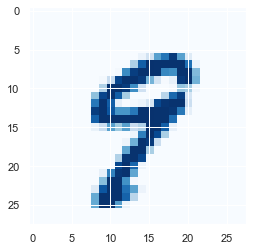


Image representation of index 12 in the "training" dataset which shows a handwritten digit.


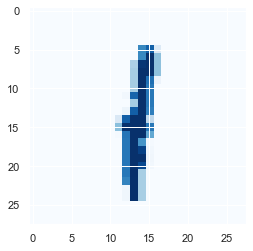


Image representation of index 17 in the "training" dataset which shows a handwritten digit.


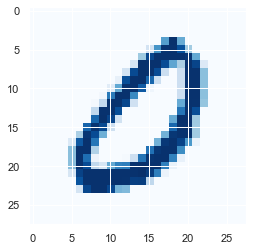


Image representation of index 22 in the "training" dataset which shows a handwritten digit.


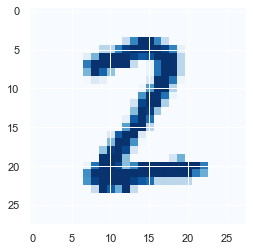


...generating features from MNIST dataset...
feature generation complete.


The significant features from the dataset were extracted using a discrete cosine transformation "DCT" algorithm.
This DCT is a decomposition of the image; horizontal, vertical, and diagonal using 3 hardcoded "masks". 
The raw data has thousands of rows/observations and hundreds of columns/features. Its reduced to the top 5 principal components.

...ranking top 5 features...
feature ranking complete.


This is a 2-D Scatterplot of all 10 classes using the top 2 principal components.


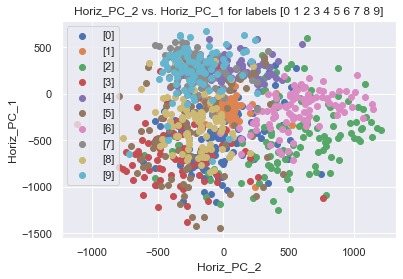


This is 2-D Scatterplot of 4 related classes using the top 2 Principal Components.


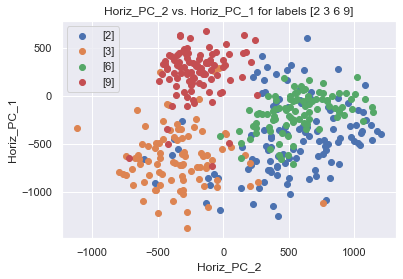


This is a Pairplot of 4 related classes using the top 4 Principal Components. It shows all 4 features compared
against one another. On the diagonal is the distribution of each feature separated in color by class.


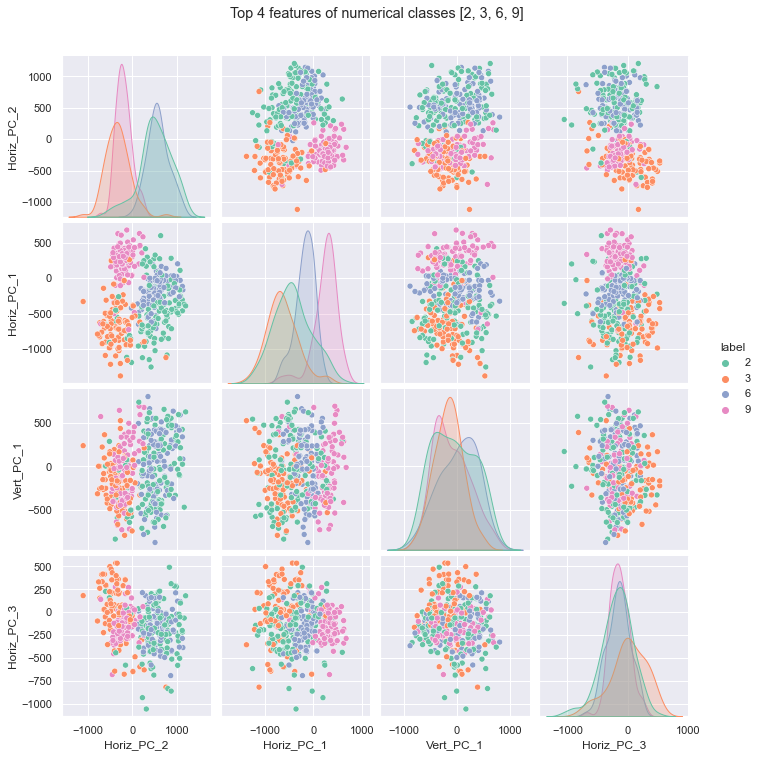


This shows a 3-D Plot of top 3 principal components for 3 most related classes (3, 6, and 9) which shows the 
separation of the each class the best. If we used this data to create a prediction model, there could some 
potential of using these features to distinguish between the different hand drawn numbers from the dataset.


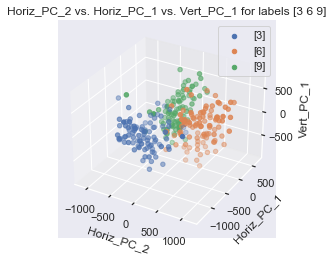

In [15]:
# Author: Josh Stine
# Created: 7/5/2021

import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dctn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import seaborn


def plot_images(dataframe, label, image_size, index):
    """
    :param dataframe: pandas dataframe
    :param label: label to drop from dataframe
    :param image_size: size of image to be reshaped; length x width are same value
    :param index: index of row to reshape/plot
    :return: matplotlib.pyplot implot of the reshaped matrix
    time complexity: O(n^3)
    T(n): (c1* n^3) + c0 + c2
    resource used: https://www.python-course.eu/neural_network_mnist.php
    """

    # drop label from dataframe and convert to numpy array
    # cost: c1 * n
    images = dataframe.drop(label, axis=1).to_numpy()

    # reshape the 1D array to 2D array given desired image_size (length x width)
    # cost = c2 * n
    image = images[index][:].reshape((image_size, image_size))

    # plot the reshaped array
    # cost = c3 * n
    plt.imshow(image, cmap='Blues')
    plt.show()
    
def generate_features(dataframe, label, size, record_count=1000, n_components=5):
    """
    :param dataframe: a pandas dataframe for the dataset
    :param size: size of the image to be reshaped. will reshape the image 1d array
    as a 2d array; shape = size x size
    :param label: label for each record as a string
    :param record_count: # of records to generate features for; defaults to 1000
    :param n_components: # of principal components to generate; defaults to 5
    :return: the features of the image
    """

    # keep track of label indexes in the dataframe
    labels = dataframe[label][:]
    idx0 = []
    idx1 = []
    idx2 = []
    idx3 = []
    idx4 = []
    idx5 = []
    idx6 = []
    idx7 = []
    idx8 = []
    idx9 = []

    for index in labels.index:
        if labels[index] == 0:
            idx0.append(index)
        elif labels[index] == 1:
            idx1.append(index)
        elif labels[index] == 2:
            idx2.append(index)
        elif labels[index] == 3:
            idx3.append(index)
        elif labels[index] == 4:
            idx4.append(index)
        elif labels[index] == 5:
            idx5.append(index)
        elif labels[index] == 6:
            idx6.append(index)
        elif labels[index] == 7:
            idx7.append(index)
        elif labels[index] == 8:
            idx8.append(index)
        elif labels[index] == 9:
            idx9.append(index)

    # DCT image mask arrays; each of the masks are the frequencies of the image we are focused on to generate features
    # of the diagonal, vertical, and horizontal image frequencies
    diag_mask = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
    diag_mask = np.array(diag_mask).reshape(28, 28)

    vert_mask = [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
    vert_mask = np.array(vert_mask).reshape((28, 28))

    horiz_mask = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
    horiz_mask = np.array(horiz_mask).reshape((28, 28))

    # arrays to keep track of features of each image
    data_diag = []
    data_vert = []
    data_horiz = []

    # loop through each of the records to generate features of each image
    for ind in range(record_count):
        # reshape the 1D array to 2D array given desired size (length x width)
        image = dataframe.iloc[[ind][:]].drop(label, axis=1).to_numpy().reshape((size, size))

        # get the dct image so we can multiply the decomposed image with the diagonal, vertical, horiztonal masks above
        # the masks are just the frequencies of the images we are processing
        # extract all non-zero values so we have the new total number of 'features' for each of the diag, vert, horiz
        dct_image = dctn(image, norm='ortho')

        dct_diag = dct_image * diag_mask
        data_diag.append(dct_diag[dct_diag != 0])  # appends all non-zero values

        dct_vert = dct_image * vert_mask
        data_vert.append(dct_vert[dct_vert != 0])

        dct_horiz = dct_image * horiz_mask
        data_horiz.append(dct_horiz[dct_horiz != 0])

    # reduce the number of features for each coefficient set (diag, vert, and horiz) by doing
    # PCA on the coefficient covariance matrix, then transpose the resulting matrix to get eigen vectors.
    # then select top n principal components from each PCA (n_components is an argument to the function)
    cov_diag = np.cov(np.array(data_diag).T)
    C_eigVecD = np.array(PCA().fit(cov_diag).components_.T)
    reduced_diag_data = pandas.DataFrame(np.matmul(np.array(data_diag), C_eigVecD[:, :n_components]))
    PC_diag_col_names = []
    for index in range(n_components):
        PC_diag_col_names.append('Diag_PC_' + str(index + 1))

    cov_vert = np.cov(np.array(data_vert).T)
    C_eigVecV = np.array(PCA().fit(cov_vert).components_.T)
    reduced_vert_data = pandas.DataFrame(np.matmul(np.array(data_vert), C_eigVecV[:, :n_components]))
    PC_vert_col_names = []
    for index in range(n_components):
        PC_vert_col_names.append('Vert_PC_' + str(index + 1))

    cov_horiz = np.cov(np.array(data_horiz).T)
    C_eigVecH = np.array(PCA().fit(cov_horiz).components_.T)
    reduced_horiz_data = pandas.DataFrame(np.matmul(np.array(data_horiz), C_eigVecH[:, :n_components]))
    PC_horiz_col_names = []
    for index in range(n_components):
        PC_horiz_col_names.append('Horiz_PC_' + str(index + 1))

    # add features from each PCA coefficient set with labels to a new dataframe pcaFeatures
    pcaFeatures = pandas.DataFrame(labels.iloc[:record_count])
    for index in range(n_components):
        pcaFeatures['Diag_PC_' + str(index + 1)] = reduced_diag_data.iloc[:, index]
    for index in range(n_components):
        pcaFeatures['Vert_PC_' + str(index + 1)] = reduced_vert_data.iloc[:, index]
    for index in range(n_components):
        pcaFeatures['Horiz_PC_' + str(index + 1)] = reduced_horiz_data.iloc[:, index]
    return pcaFeatures


def rank_features_RFC(dataframe, label):
    """
    ranks a given set of features given as a dataframe; specify the label to rank by
    :param dataframe: pandas dataframe
    :param label: label is a string, it should be how we are classifying our data (ex: iris 'species')
    :return: a numpy matrix of all the features with their ranking from the given dataframe
    resource used: https://www.kaggle.com/dkim1992/feature-selection-ranking
    """
    # x-axis will be all features so we will drop the label
    x = dataframe.drop(label, axis=1)
    # y-axis is the label for the data analysis
    y = dataframe[label]

    # create a random forest for the data set for features of the label then add the feature_importance
    # importance of each to an array
    classifier = RandomForestClassifier().fit(x, y)
    rankings = []
    for index in range(len(x.columns)):
        rankings.append([x.columns[index], classifier.feature_importances_[index]])
    ranked_features = pandas.DataFrame(rankings, columns=['Feature', 'Explained Variance'])
    return ranked_features.sort_values(by='Explained Variance', ascending=False)


def plot_features(dataframe, label, feature_1, feature_2, feature_3=None, save_plot=False):
    """
    :param dataframe: pandas dataframe of input data
    :param label: label of the dataframe
    :param feature_1: feature 1 to plot on x xis
    :param feature_2: feature 2 to plot on y axis
    :param feature_3: optional feature 3 to plot on z axis
    :param save_plot: true/false to save the plot with the plot title as the file name; defaults to false
    :return: a plot of all classes in the dataframe
    """
    labels = dataframe[label].unique()
    labels.sort()
    classes = []
    for lbl in labels:
        classes.append(dataframe[dataframe[label] == lbl])

    # 2-D scatter plot for 2 features
    if feature_3 is None:
        for cls in classes:
            name = cls[label].unique()
            plt.scatter(cls[feature_1], cls[feature_2], label=name)
        plt.legend()
        plt.title(feature_1 + ' vs. ' + feature_2 + ' for labels ' + str(labels))
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)
        if save_plot:
            plt.savefig(feature_1 + ' vs. ' + feature_2 + ' for labels ' + str(labels) + '.png')

    # 3-D plot plot for 3 features
    else:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        for cls in classes:
            name = cls[label].unique()
            ax.scatter(cls[feature_1], cls[feature_2], cls[feature_3], label=name)
        plt.title(feature_1 + ' vs. ' + feature_2 + ' vs. ' + feature_3 + ' for labels ' + str(labels))
        ax.set_xlabel(feature_1)
        ax.set_ylabel(feature_2)
        ax.set_zlabel(feature_3)
        plt.legend()
        if save_plot:
            plt.savefig(feature_1 + ' vs. ' + feature_2 + 'vs. ' + feature_3 + ' for labels ' + str(labels) + '.png')

    return plt.show()


"""
MAIN DRIVER CODE
"""
print('MNIST Dataset Analysis: '
      '\nThis is a well known dataset that consists of 42,000+ hand drawn images of numbers 0-9. These images '
      '\nare 28x28 pixels which is 784 columns when flat. The dataset that represents these images are analyzed using '
      '\na discrete cosine transformation "DCT" algorithm. This DCT is a decomposition of the image; horizontal, vertical, '
      '\nand diagonal using 3 hardcoded "masks" of 0s and 1s to show the computer which pixels of the image to focus '
      '\non for the decomposition.')

# read in train.csv file to a pandas dataframe
train_data = pandas.read_csv('train.csv')   

# plot the 10 indices below to show the image representation of the data
indices_to_plot = [1, 2, 4, 7, 8, 9, 11, 12, 17, 22]
for index in indices_to_plot:
    print('\nImage representation of index ' + str(index) + ' in the "training" dataset which shows a handwritten digit.')
    plot_images(train_data, 'label', 28, index)

# reduce the # of original features in the original data set from 784 to 15
# change 4th parameter in generate_features to choose how many images to process
n_components = 5

# un-comment the code below to save features generated to excel file
"""
feature_output = pandas.ExcelWriter('pcaFeatures.xlsx')
reduced_data.to_excel(feature_output)
feature_output.save()
"""

print('\n...generating features from MNIST dataset...')
reduced_data = generate_features(train_data, 'label', 28, 1000, n_components=5)
print('feature generation complete.\n')
print('\nThe significant features from the dataset were extracted using a discrete cosine transformation "DCT" algorithm.'
      + '\nThis DCT is a decomposition of the image; horizontal, vertical, and diagonal using 3 hardcoded "masks". '
      + '\nThe raw data has thousands of rows/observations and hundreds of columns/features. Its reduced to the top '
      + str(n_components) + ' principal components.')
print('\n...ranking top ' + str(n_components) + ' features...')
reduced_data = generate_features(train_data, 'label', 28, 1000, n_components=5)
ranked_features = pandas.DataFrame(rank_features_RFC(reduced_data, 'label'))
print('feature ranking complete.\n')

print('\nThis is a 2-D Scatterplot of all 10 classes using the top 2 principal components.')
feature_1 = ranked_features.iloc[0, 0]
feature_2 = ranked_features.iloc[1, 0]
plot_features(reduced_data, 'label', feature_1, feature_2, save_plot=True)

print('\nThis is 2-D Scatterplot of 4 related classes using the top 2 Principal Components.')
class_labels = [2, 3, 6, 9]
classes_to_plot = pandas.DataFrame(reduced_data.loc[reduced_data['label'].isin(class_labels)])
ranked_features = rank_features_RFC(reduced_data, 'label')
feature_1 = ranked_features.iloc[0, 0]
feature_2 = ranked_features.iloc[1, 0]
plot_features(classes_to_plot, 'label', feature_1, feature_2, save_plot=True)

print('\nThis is a Pairplot of 4 related classes using the top 4 Principal Components. It shows all 4 features compared'
      + '\nagainst one another. On the diagonal is the distribution of each feature separated in color by class.')
class_labels = [2, 3, 6, 9]
classes_to_plot = pandas.DataFrame(reduced_data.loc[reduced_data['label'].isin(class_labels)])
ranked_features = rank_features_RFC(reduced_data, 'label')
feature_1 = ranked_features.iloc[0, 0]
feature_2 = ranked_features.iloc[1, 0]
feature_3 = ranked_features.iloc[2, 0]
feature_4 = ranked_features.iloc[3, 0]
data_to_plot = pandas.DataFrame()
data_to_plot['label'] = classes_to_plot['label']
data_to_plot[feature_1] = classes_to_plot[feature_1]
data_to_plot[feature_2] = classes_to_plot[feature_2]
data_to_plot[feature_3] = classes_to_plot[feature_3]
data_to_plot[feature_4] = classes_to_plot[feature_4]
seaborn.set(font_scale=1)
seaborn.pairplot(data_to_plot, hue='label', palette='Set2').fig.suptitle(
    "Top 4 features of numerical classes " + str(class_labels), y=1.05)
plt.show()

print('\nThis shows a 3-D Plot of top 3 principal components for 3 most related classes (3, 6, and 9) which shows the '
      '\nseparation of the each class the best. If we used this data to create a prediction model, there could some '
      '\npotential of using these features to distinguish between the different hand drawn numbers from the dataset.')
# only plot the classes below from the reduced dataset
class_labels = [3, 6, 9]
classes_to_plot = pandas.DataFrame(
    reduced_data.loc[reduced_data['label'].isin(class_labels)])  # only plot the classes below from the reduced dataset

# rank features
ranked_features = rank_features_RFC(reduced_data, 'label')

# plot top 3 features
feature_1 = ranked_features.iloc[0, 0]
feature_2 = ranked_features.iloc[1, 0]
feature_3 = ranked_features.iloc[2, 0]
plot_features(classes_to_plot, 'label', feature_1, feature_2, feature_3, save_plot=True)